In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Bilder laden

#dataset = datasets.cifar10.load_data()
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [3]:

images, labels = [], []

relImgPath = os.path.join("data", "images", "augmented")
imgPaths = []
for dirpath, dirnames, filenames in os.walk(relImgPath):
    if dirnames:
        classes = {}
        for index, name in enumerate(dirnames):
            classes[name]=index
    for filename in filenames:# [f for f in 
        path = os.path.join(dirpath, filename)
        key = dirpath[dirpath.rindex('\\')+1:]
        images.append(cv2.imread(path, cv2.COLOR_BGR2RGB))
        labels.append(classes[key])

In [4]:
ratio = 0.8

images = np.array(images)
labels = np.array(labels)

train_images, train_labels = images[:int(len(images)*ratio)], labels[:int(len(images)*ratio)]
test_images, test_labels = images[int(len(images)*ratio):], labels[int(len(images)*ratio):]

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/10
493/493 [==============================] - 446s 905ms/step - loss: 7.3473 - accuracy: 0.5857 - val_loss: 4.0001 - val_accuracy: 0.0000e+00
Epoch 2/10
493/493 [==============================] - 433s 878ms/step - loss: 0.8202 - accuracy: 0.6134 - val_loss: 4.6318 - val_accuracy: 0.0000e+00
Epoch 3/10
493/493 [==============================] - 433s 878ms/step - loss: 0.7175 - accuracy: 0.6908 - val_loss: 6.6792 - val_accuracy: 0.0117
Epoch 4/10
493/493 [==============================] - 433s 878ms/step - loss: 0.5968 - accuracy: 0.7585 - val_loss: 9.2854 - val_accuracy: 0.0274
Epoch 5/10
493/493 [==============================] - 431s 874ms/step - loss: 0.4812 - accuracy: 0.8102 - val_loss: 11.8371 - val_accuracy: 0.0312
Epoch 6/10
493/493 [==============================] - 430s 873ms/step - loss: 0.4040 - accuracy: 0.8420 - val_loss: 17.2559 - val_accuracy: 0.0457
Epoch 7/10
493/493 [==============================] - 430s 872ms/step - loss: 0.3673 - accuracy: 0.8581 - val_loss

124/124 - 23s - loss: 26.6187 - accuracy: 0.0681


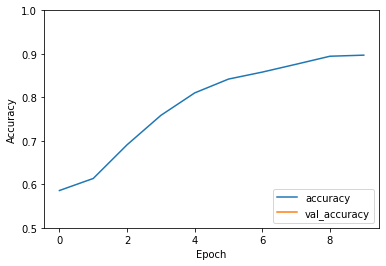

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
print(test_acc)

0.0680721327662468


In [10]:
model.save('models/test')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/test\assets
